## Lecture 4

---

### 2. Correlation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

#### Mean

In [3]:
# Distance in mega-parsecs (mpc)
Xs = np.array(
    [
        0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
        0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
        1.72, 2.03, 2.02, 2.02, 2.02
    ]
)

# Apparent Velocity (km/s)
Ys = np.array(
    [
        -19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
        93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
        840.0, 801.0, 519.0
    ]
)

N = 24

# Calculate the mean of each array
mu_X = np.mean(Xs)
mu_Y = np.mean(Ys)

print("Mean Distance", mu_X)
print("Mean Velocity", mu_Y)

Mean Distance 0.9199250000000001
Mean Velocity 425.6175


#### Standard Deviation

In [4]:
# Calculate the standard deviation of each measurement
sX = np.sqrt(np.sum((Xs - mu_X)**2) / (N - 1))
sY = np.sqrt(np.sum((Ys - mu_Y)**2) / (N - 1))

print("Standard Deviation of Distance", sX)
print("Standard Deviation of Velocity", sY)


Standard Deviation of Distance 0.6533948258734996
Standard Deviation of Velocity 348.7336574977229


#### Covariance

In [5]:
# Calculate the covariance of the two measurements
covXY = np.sum((Xs - mu_X) * (Ys - mu_Y)) / (N - 1)

print("Covariance", covXY)

Covariance 191.20706528260868


### 3. Correlation Coefficient

#### Hubble Correlation

In [6]:
# Calculate the correlation coefficient
r = covXY / (sX * sY)

print("Correlation Coefficient", r)

Correlation Coefficient 0.8391399162310663


### 4. Regression

In [8]:
# Calculate the slope of the line
beta_1 = r * sY / sX

# Calculate the y-intercept
beta_0 = mu_Y - beta_1 * mu_X

print("Slope", beta_1)
print("Y-Intercept", beta_0)

Slope 447.87059914099837
Y-Intercept 13.610139085217043


### 5. Non Linear Regression

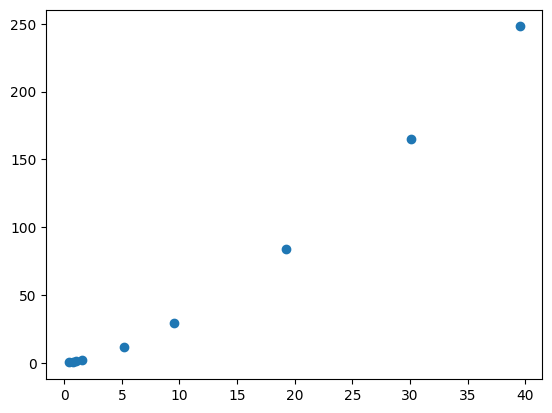

In [14]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

# Plot the data
plt.plot(Xs, Ys, 'o')
plt.show()

In [15]:
# Calculate the mean of each array
mu_X = np.mean(Xs)
mu_Y = np.mean(Ys)

# Calculate the standard deviation of each measurement
sX = np.sqrt(np.sum((Xs - mu_X)**2) / (N - 1))
sY = np.sqrt(np.sum((Ys - mu_Y)**2) / (N - 1))

# Calculate the covariance of the two measurements
covXY = np.sum((Xs - mu_X) * (Ys - mu_Y)) / (N - 1)

# Calculate the correlation coefficient
r = covXY / (sX * sY)

print("Correlation Coefficient", r)

Correlation Coefficient 0.9888323018726735


#### Residuals

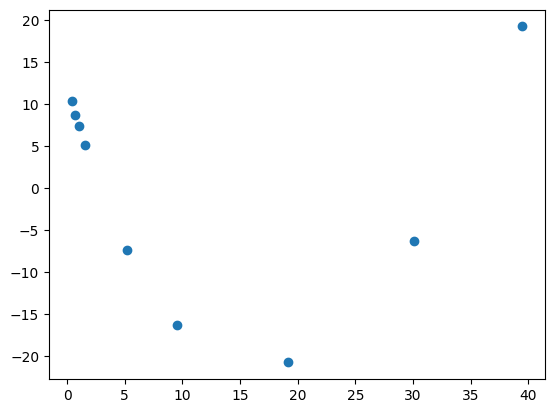

In [18]:
# Calculate the slope of the line
beta_1 = r * sY / sX

# Calculate the y-intercept
beta_0 = mu_Y - beta_1 * mu_X

# Calculate the predicted values of Y
Yp = beta_0 + beta_1 * Xs

# Calculate the residuals
residuals = Ys - Yp

# Plot the residuals against X
plt.plot(Xs, residuals, 'o')
plt.show()

#### Q-Q Plot

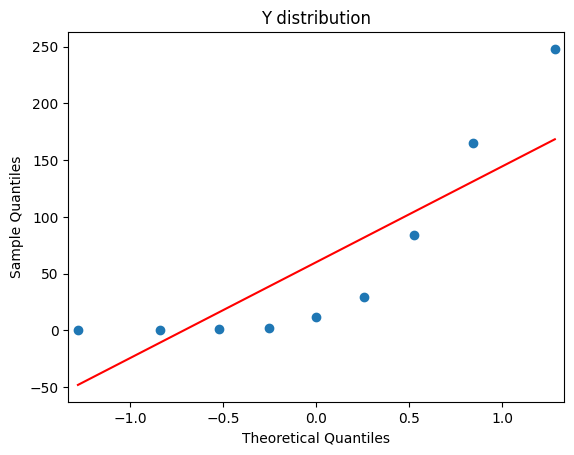

In [26]:
import statsmodels.api as sm

# Create qq-plots for both X and Y
sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

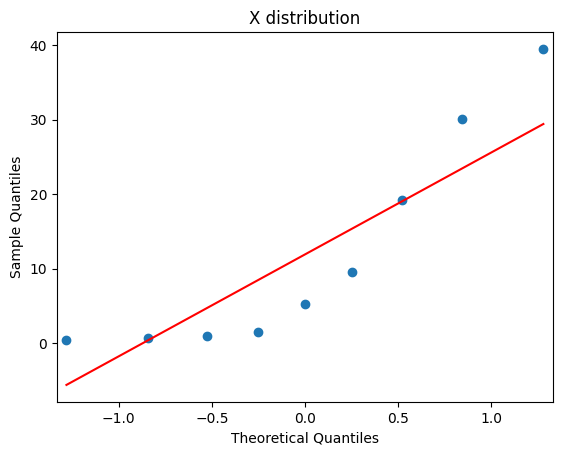

In [32]:
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

#### Non Linear Transformation

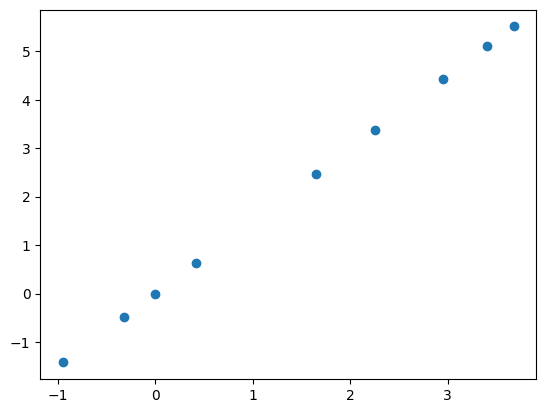

In [33]:
# Plot ln(X) vs ln(Y)
plt.plot(np.log(Xs), np.log(Ys), 'o')
plt.show()

# The data fits almost perfectly to a straight line when using
# the log of X and Y
X_prime = np.log(Xs)
Y_prime = np.log(Ys)

#### Non Linear Model

In [34]:
# Get the mean of the log of X and Y
mu_X_prime = np.mean(X_prime)
mu_Y_prime = np.mean(Y_prime)

# Get the standard deviation of the log of X and Y
sX_prime = np.sqrt(np.sum((X_prime - mu_X_prime)**2) / (N - 1))
sY_prime = np.sqrt(np.sum((Y_prime - mu_Y_prime)**2) / (N - 1))

# Get the covariance of the log of X and Y
covXY_prime = np.sum((X_prime - mu_X_prime) * (Y_prime - mu_Y_prime)) / (N - 1)

# Get the correlation coefficient
r_prime = covXY_prime / (sX_prime * sY_prime)

# Get the slope and y-intercept of the line that uses
beta_1 = r_prime * sY_prime / sX_prime
beta_0 = mu_Y_prime - beta_1 * mu_X_prime

print("Slope", beta_1)
print("Y-Intercept", beta_0)


Slope 1.4995325773381893
Y-Intercept 0.0013370447605036695


### 6. Multiple Linear Regression


In [36]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [44]:
y = LogPlanetMass.copy()

# Create an array of ones to use as the x-intercept
x0 = np.ones(N)

# Concatenate the x-intercept and the x-values into a single matrix
# (Transpose the matrix to leave each column as a feature)
Xmat = np.vstack((
    x0, 
    LogPlanetRadius, 
    LogPlanetOrbit, 
    StarMetallicity, 
    LogStarMass, 
    LogStarAge
)).T

# Check if the matrix X^TX is invertible
if np.linalg.det(Xmat.T @ Xmat) == 0:
    raise Exception("X^TX is not invertible")
else:
    print("X^TX is invertible")

# Calculate the coefficients
coefficients = np.linalg.inv(Xmat.T @ Xmat) @ Xmat.T @ y

print(f"Coefficients: {coefficients}")

X^TX is invertible
Coefficients: [ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]


### 7. Model Selection and Regularization

In [47]:
# First, estimate the standard deviation of the noise.
sigmaHat = np.sqrt( np.sum( np.square(y - Xmat.dot(coefficients) )) / ( N - Xmat.shape[1] ) )

# Now estimate the (matrix part of the) covariance matrix for beta 
betaCov = np.linalg.inv(Xmat.T.dot(Xmat))

# Use the formula for the t-test statistic for each variable
tVals = coefficients/(sigmaHat * np.sqrt(np.diagonal(betaCov)))

# Calculate the 2-sided p-values.
pvals = scipy.stats.t.sf(np.abs(tVals), N-Xmat.shape[1])*2


# Order of the p-values:
# - x-intercept
# - LogPlanetRadius
# - LogPlanetOrbit
# - StarMetallicity
# - LogStarMass
# - LogStarAge
print(f"p-values: {pvals}")

p-values: [9.12757006e-01 5.43077387e-05 6.98598654e-01 2.13109749e-01
 4.00456619e-01 2.25952781e-01]
